In [9]:
import os
import pandas as pd
import json

In [10]:
pose_dict = './UBNormalAlphaPoseOutput'
video_dict = './data/UBnormal'

In [11]:
def get_jsons(directory: str):
    """Function that exctracts the mp4 files from the given directory
    and returns the path to the video and it's annotations
    """
    filelist = [];
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.json'):
                json_file = os.path.join(root,file)
                filelist.append(json_file)
    return filelist

def load_pose_jsons(json_files):
    dfs = []
    for file in json_files:
        if file.endswith('results.json'):
            df = pd.read_json(file)
            df['video'] = '_'.join(file.split('/')[-1].split('-')[0].split('_')[0:-1])
            if 'abnormal' in file:
                df['label'] = 'abnormal'
            else:
                df['label'] = 'normal'
            df = df[['video', 'image_id', 'label', 'keypoints', 'score']]
            dfs.append(df)
    df_overview = pd.concat(dfs, ignore_index=True)
    return df_overview

def load_tracking_jsons(json_files):
    dfs = []
    for file in json_files:
        if file.endswith('tracked_person.json'):
            with open(file) as f:
                tracking = json.load(f)
            items = []
            for v in tracking.values():
                for d in v.values():
                    items.append(d)
            if items:
                df = pd.DataFrame(items)
                df['video'] = '_'.join(file.split('/')[-1].split('-')[0].split('_')[0:-1])
                if 'abnormal' in file:
                    df['label'] = 'abnormal'
                else:
                    df['label'] = 'normal'
                df = df[['video','label', 'keypoints', 'scores']]
                dfs.append(df)
    df_overview = pd.concat(dfs, ignore_index=True)
    return df_overview

In [7]:
json_files = get_jsons(pose_dict)
df_overview = load_pose_jsons(json_files)

In [8]:
df_overview.groupby('label').count()

,video,image_id,keypoints,score
label,,,,
abnormal,497873,497873,497873,497873
normal,492307,492307,492307,492307


In [8]:
df_overview['score'].mean()

NameError: name 'df_overview' is not defined

<AxesSubplot:>

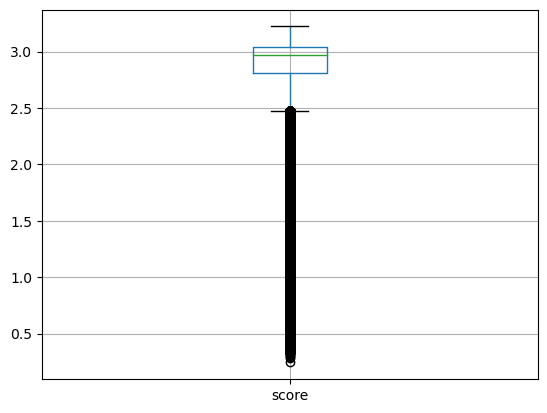

In [9]:
df_overview.boxplot('score')

In [5]:
df_provided_poses = load_tracking_jsons(get_jsons('/mnt/c/Users/ruben/Downloads/data/data/UBnormal'))

In [6]:
df_provided_poses.groupby('label').count()

,video,keypoints,scores
label,,,
abnormal,99507,99507,99507
normal,361031,361031,361031


<AxesSubplot:>

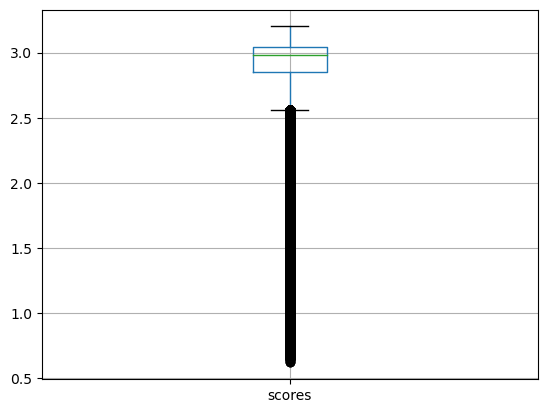

In [7]:
df_provided_poses.boxplot('scores')